In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
file = pd.read_csv("E:/final year project implementaion/Visualization-and-XGBoost-for-question-duplication/data/Quora features/train features with is_duplicate.csv", encoding = "ISO-8859-1")
file.head(5)

,id,question1,question2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,...,jaccard_distance,canberra_distance,euclidean_distance,minkowski_distance,braycurtis_distance,skew_q1vec,skew_q2vec,kur_q1vec,kur_q2vec,is_duplicate
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,66,57,9,20,20,14,12,...,1.0,94.023324,0.371408,0.168999,0.186557,0.031817,-0.091902,0.050416,0.337301,0
1,1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,51,88,-37,21,29,8,13,...,1.0,177.588090,1.012091,0.455910,0.592655,0.008735,0.094704,0.284010,-0.034444,0
2,2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,73,59,14,25,24,14,10,...,1.0,135.988707,0.666346,0.307828,0.342306,0.239752,0.144554,0.026759,-0.474131,0
3,3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,50,65,-15,19,26,11,9,...,1.0,192.237828,1.140536,0.506028,0.692421,-0.002527,0.069649,-0.244560,-0.265568,0
4,4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,76,39,37,25,18,13,7,...,1.0,161.408435,0.860225,0.382770,0.480633,-0.133849,0.114777,0.217900,-0.338876,0


In [6]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 32 columns):
id                               404290 non-null int64
question1                        404290 non-null object
question2                        404288 non-null object
len_q1                           404290 non-null int64
len_q2                           404290 non-null int64
diff_len                         404290 non-null int64
len_char_q1                      404290 non-null int64
len_char_q2                      404290 non-null int64
len_word_q1                      404290 non-null int64
len_word_q2                      404290 non-null int64
common_words                     404290 non-null int64
fuzz_qratio                      404290 non-null int64
fuzz_WRatio                      404290 non-null int64
fuzz_partial_ratio               404290 non-null int64
fuzz_partial_token_set_ratio     404290 non-null int64
fuzz_partial_token_sort_ratio    404290 non-null int64
fuzz_to

In [7]:
file.describe()

,id,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,fuzz_qratio,...,jaccard_distance,canberra_distance,euclidean_distance,minkowski_distance,braycurtis_distance,skew_q1vec,skew_q2vec,kur_q1vec,kur_q2vec,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,...,403765.000000,404290.000000,404290.000000,404290.000000,403765.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,59.536716,60.108380,-0.571664,20.225845,20.209743,10.942210,11.181991,4.511586,61.951302,...,0.929214,131.861081,0.663704,0.299401,0.370840,0.010062,0.010109,-0.060757,-0.061902,0.369198
std,116708.614503,29.940641,33.863845,32.566669,4.178760,4.306449,5.428824,6.305246,3.098622,18.374420,...,0.256463,48.962799,0.312147,0.140878,0.200491,0.135191,0.134789,0.309571,0.306704,0.482588
min,0.000000,1.000000,1.000000,-1080.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.669451,-0.669451,-3.000000,-3.000000,0.000000
25%,101072.250000,39.000000,39.000000,-11.000000,17.000000,17.000000,7.000000,7.000000,2.000000,47.000000,...,1.000000,112.810405,0.477092,0.215206,0.245795,-0.080374,-0.080074,-0.239157,-0.240359,0.000000
50%,202144.500000,52.000000,51.000000,0.000000,20.000000,20.000000,10.000000,10.000000,4.000000,61.000000,...,1.000000,138.694765,0.666325,0.300516,0.352881,0.011222,0.011184,-0.082239,-0.083331,0.000000
75%,303216.750000,72.000000,72.000000,12.000000,23.000000,23.000000,13.000000,13.000000,6.000000,77.000000,...,1.000000,161.490627,0.858985,0.387447,0.475162,0.101126,0.100305,0.101729,0.100128,1.000000
max,404289.000000,623.000000,1169.000000,487.000000,52.000000,55.000000,125.000000,237.000000,41.000000,100.000000,...,1.000000,300.000000,1.496936,0.682163,1.136902,0.675833,0.781670,2.288984,2.227666,1.000000


# Exploratory Data Analysis

Use seaborn to create a jointplot to compare the distances and is_duplicate and find if the correlation make sense !

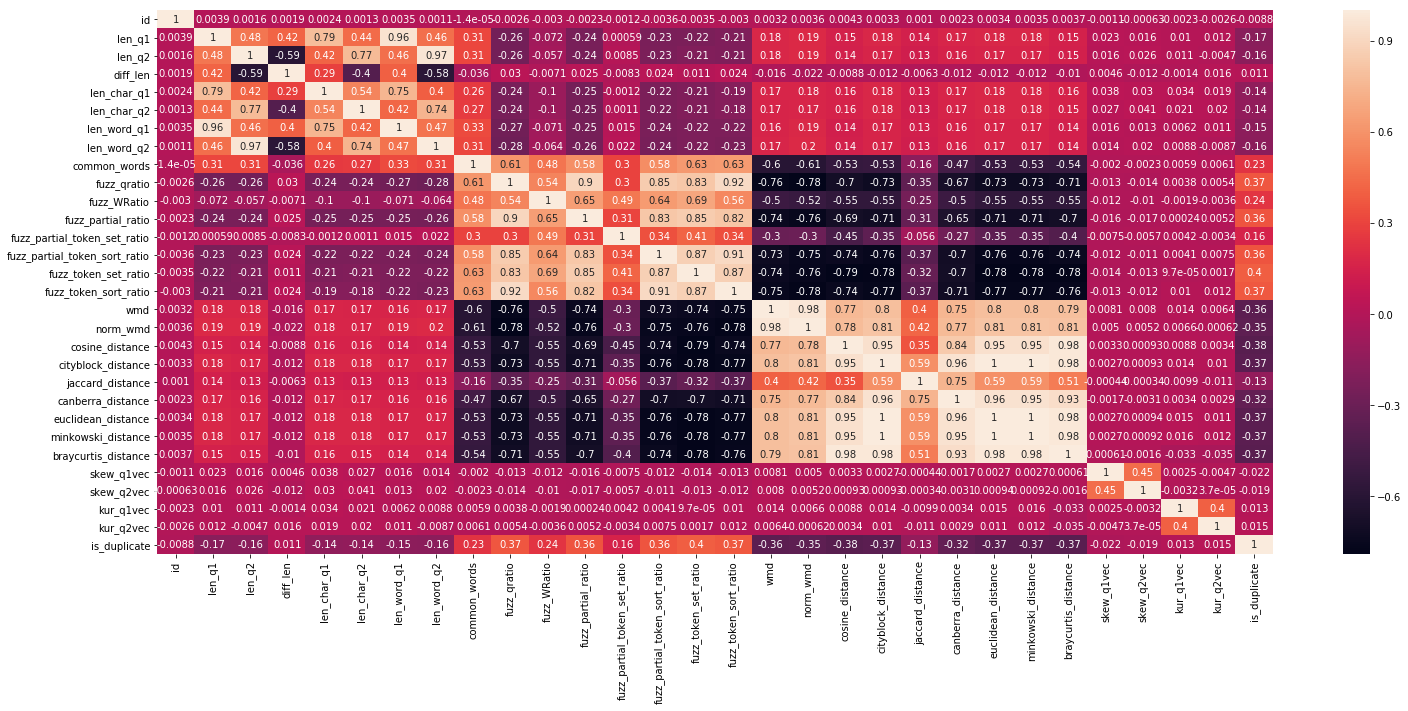

In [9]:
plt.figure(figsize = (25,10))
sns.heatmap(file.corr(),annot=True)

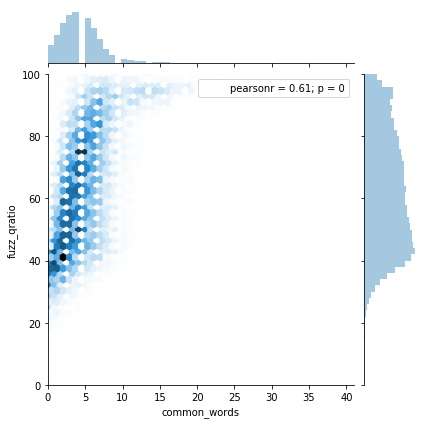

In [22]:
sns.jointplot(x='common_words',y='fuzz_qratio',data=file,kind='hex')


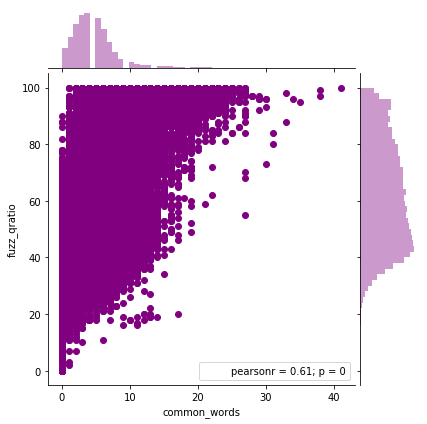

In [24]:
sns.jointplot(x='common_words',y='fuzz_qratio',data=file,color='purple',space=0.1)

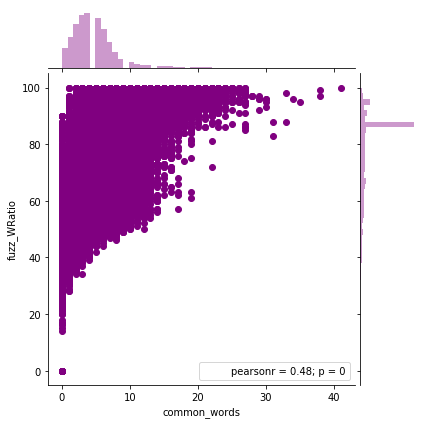

In [26]:
sns.jointplot(x='common_words',y='fuzz_WRatio',data=file,color='purple',space=0.1)

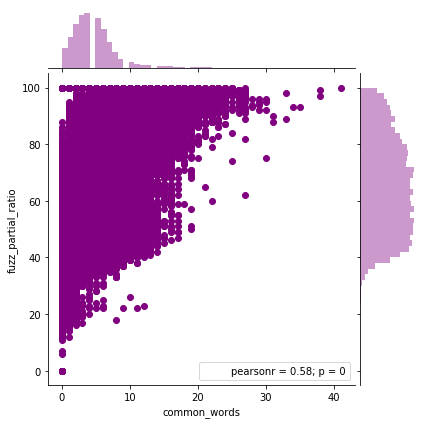

In [27]:
sns.jointplot(x='common_words',y='fuzz_partial_ratio',data=file,color='purple',space=0.1)

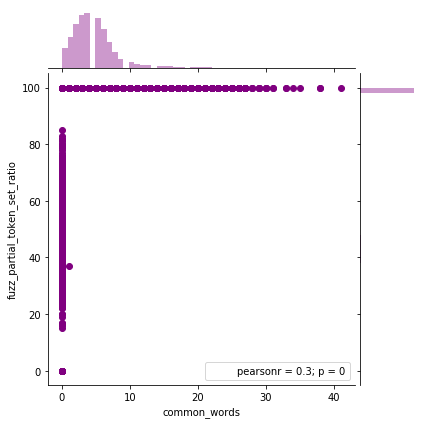

In [30]:
sns.jointplot(x='common_words',y='fuzz_partial_token_set_ratio',data=file,color='purple',space=0.1)

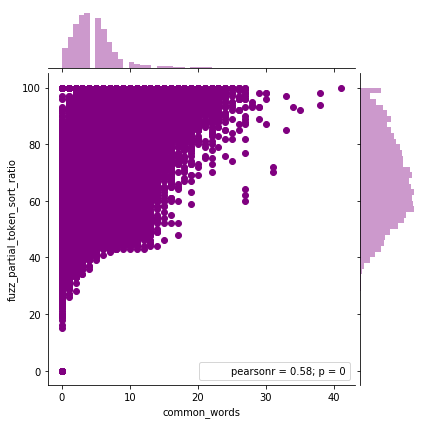

In [31]:
sns.jointplot(x='common_words',y='fuzz_partial_token_sort_ratio',data=file,color='purple',space=0.1)

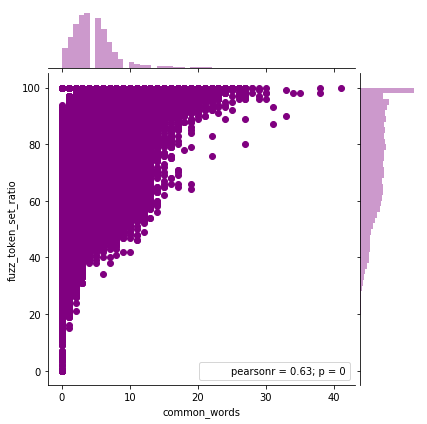

In [32]:
sns.jointplot(x='common_words',y='fuzz_token_set_ratio',data=file,color='purple',space=0.1)

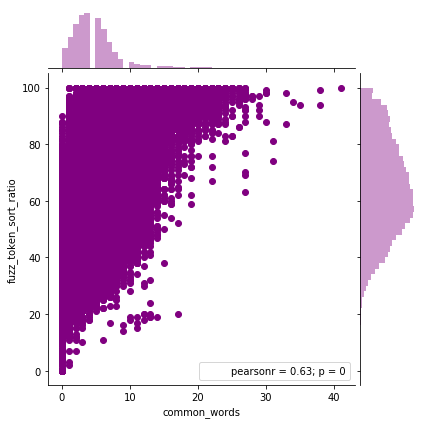

In [33]:
sns.jointplot(x='common_words',y='fuzz_token_sort_ratio',data=file,color='purple',space=0.1)

OverflowError: cannot convert float infinity to integer

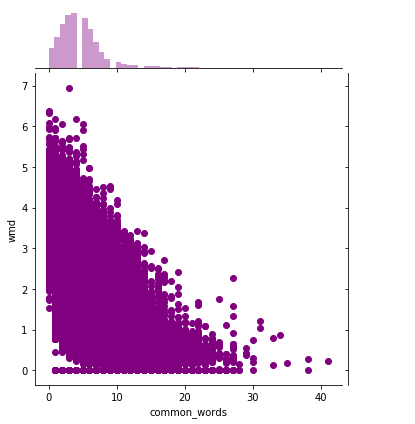

In [34]:
sns.jointplot(x='common_words',y='wmd',data=file,color='purple',space=0.1)

OverflowError: cannot convert float infinity to integer

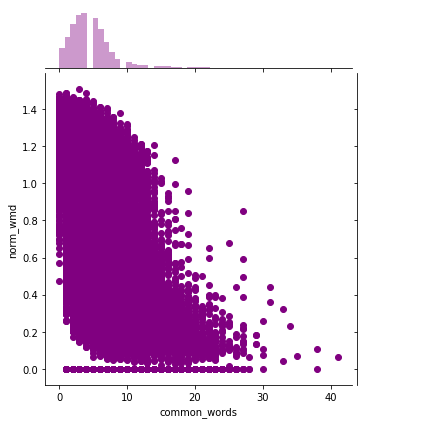

In [35]:
sns.jointplot(x='common_words',y='norm_wmd',data=file,color='purple',space=0.1)

OverflowError: cannot convert float infinity to integer

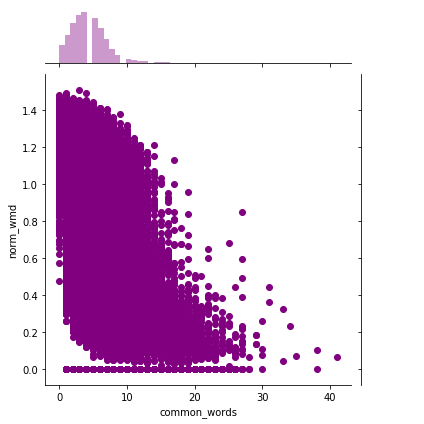

In [37]:
sns.jointplot(x='common_words',y='norm_wmd',data=file,color='purple')

# Distances plotted in normal and Hexagonal way

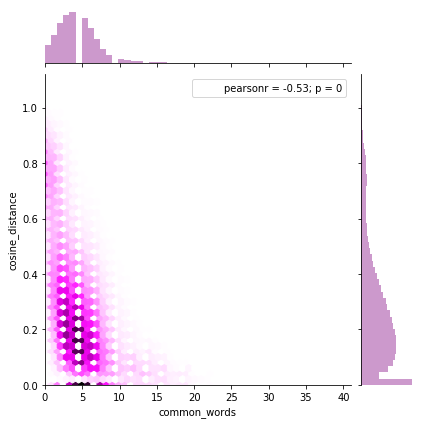

In [39]:
sns.jointplot(x='common_words',y='cosine_distance',data=file,color='purple', kind='hex')

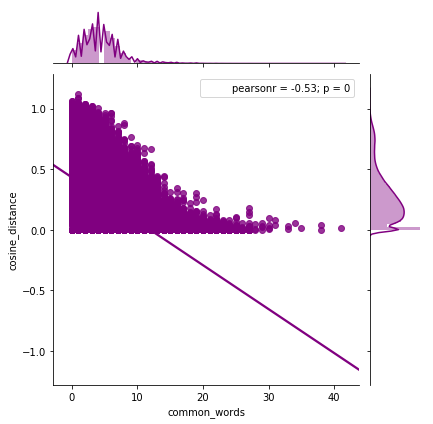

In [46]:
sns.jointplot(x='common_words',y='cosine_distance',data=file,color='purple', kind='reg')

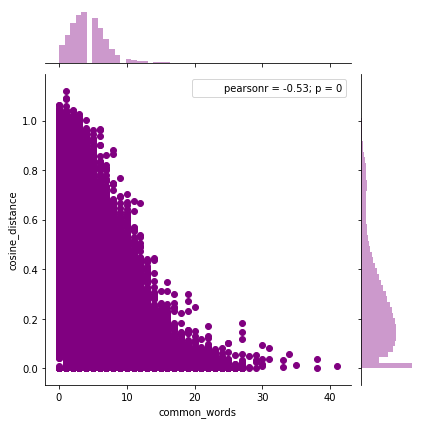

In [40]:
sns.jointplot(x='common_words',y='cosine_distance',data=file,color='purple')

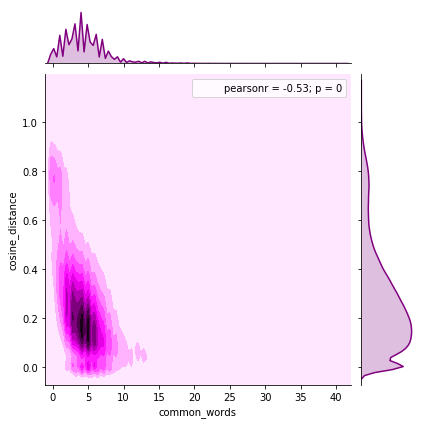

In [47]:
sns.jointplot(x='common_words',y='cosine_distance',data=file,color='purple', kind="kde")

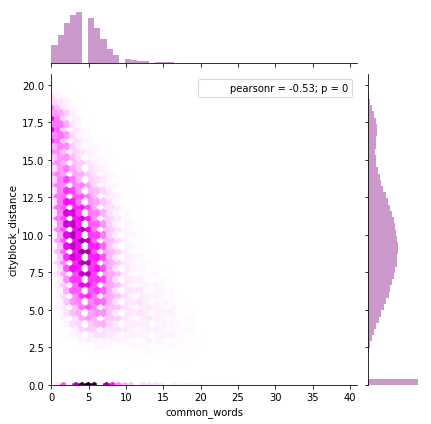

In [41]:
sns.jointplot(x='common_words',y='cityblock_distance',data=file,color='purple', kind='hex')

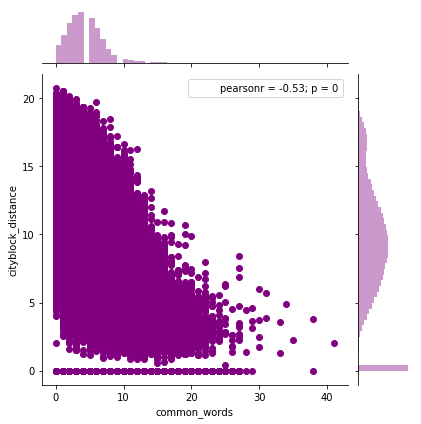

In [42]:
sns.jointplot(x='common_words',y='cityblock_distance',data=file,color='purple')

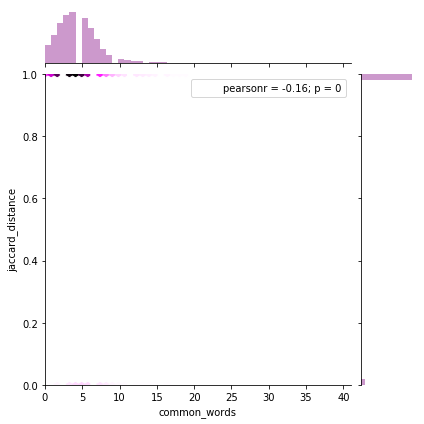

In [44]:
sns.jointplot(x='common_words',y='jaccard_distance',data=file,color='purple', kind="hex")

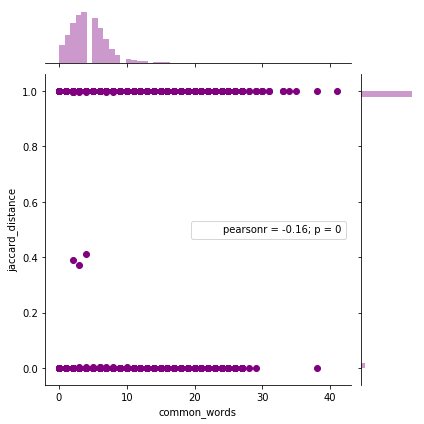

In [45]:
sns.jointplot(x='common_words',y='jaccard_distance',data=file,color='purple')

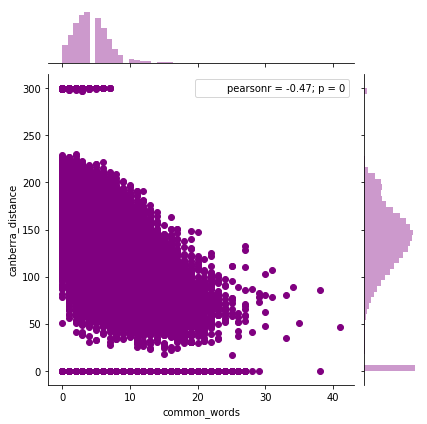

In [48]:
sns.jointplot(x='common_words',y='canberra_distance',data=file,color='purple')

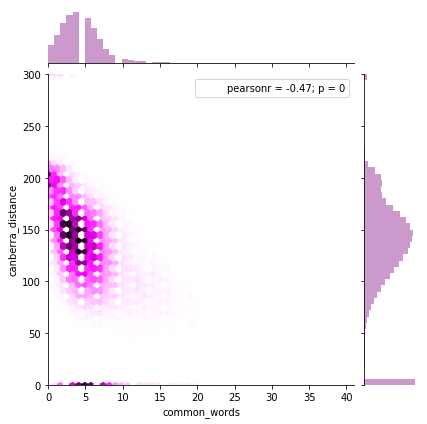

In [49]:
sns.jointplot(x='common_words',y='canberra_distance',data=file,color='purple', kind="hex")

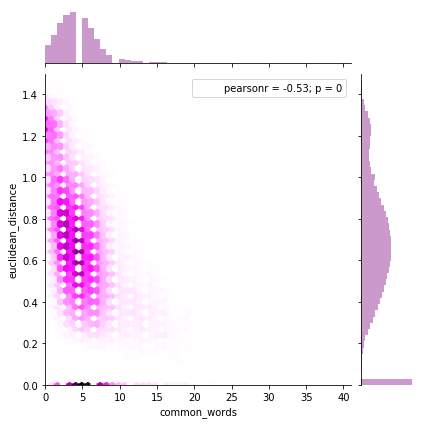

In [50]:
sns.jointplot(x='common_words',y='euclidean_distance',data=file,color='purple', kind="hex")

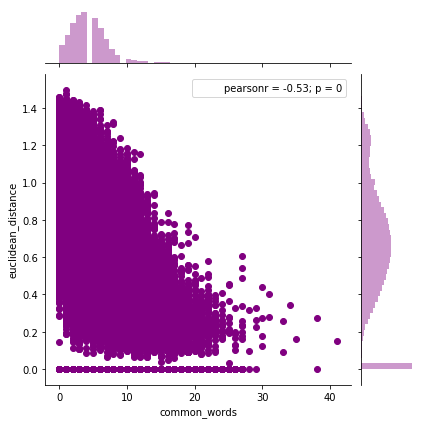

In [51]:
sns.jointplot(x='common_words',y='euclidean_distance',data=file,color='purple')

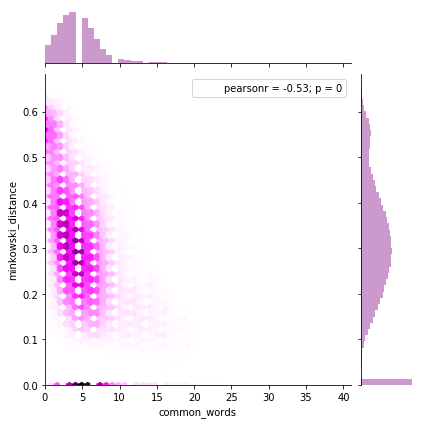

In [52]:
sns.jointplot(x='common_words',y='minkowski_distance',data=file,color='purple', kind="hex")

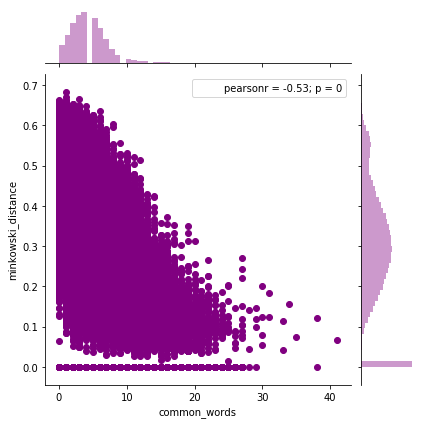

In [53]:
sns.jointplot(x='common_words',y='minkowski_distance',data=file,color='purple')

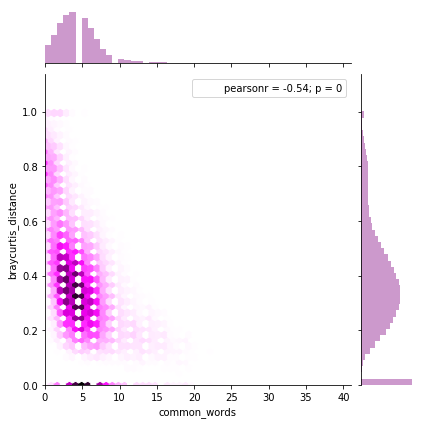

In [54]:
sns.jointplot(x='common_words',y='braycurtis_distance',data=file,color='purple', kind="hex")

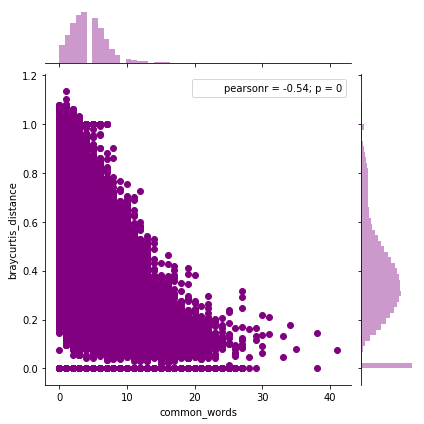

In [55]:
sns.jointplot(x='common_words',y='braycurtis_distance',data=file,color='purple')

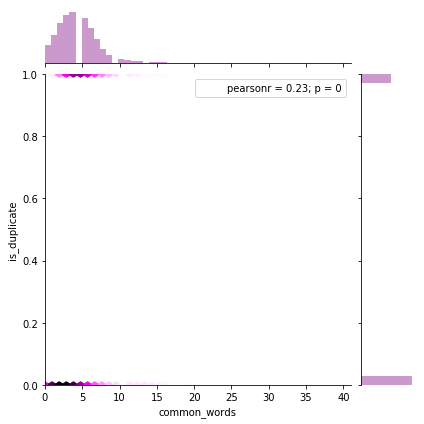

In [56]:
sns.jointplot(x='common_words',y='is_duplicate',data=file,color='purple', kind="hex")

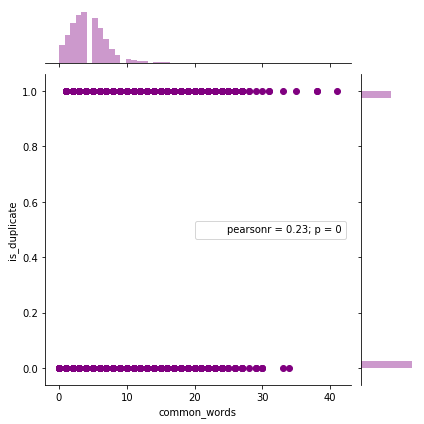

In [57]:
sns.jointplot(x='common_words',y='is_duplicate',data=file,color='purple')

ValueError: range parameter must be finite.

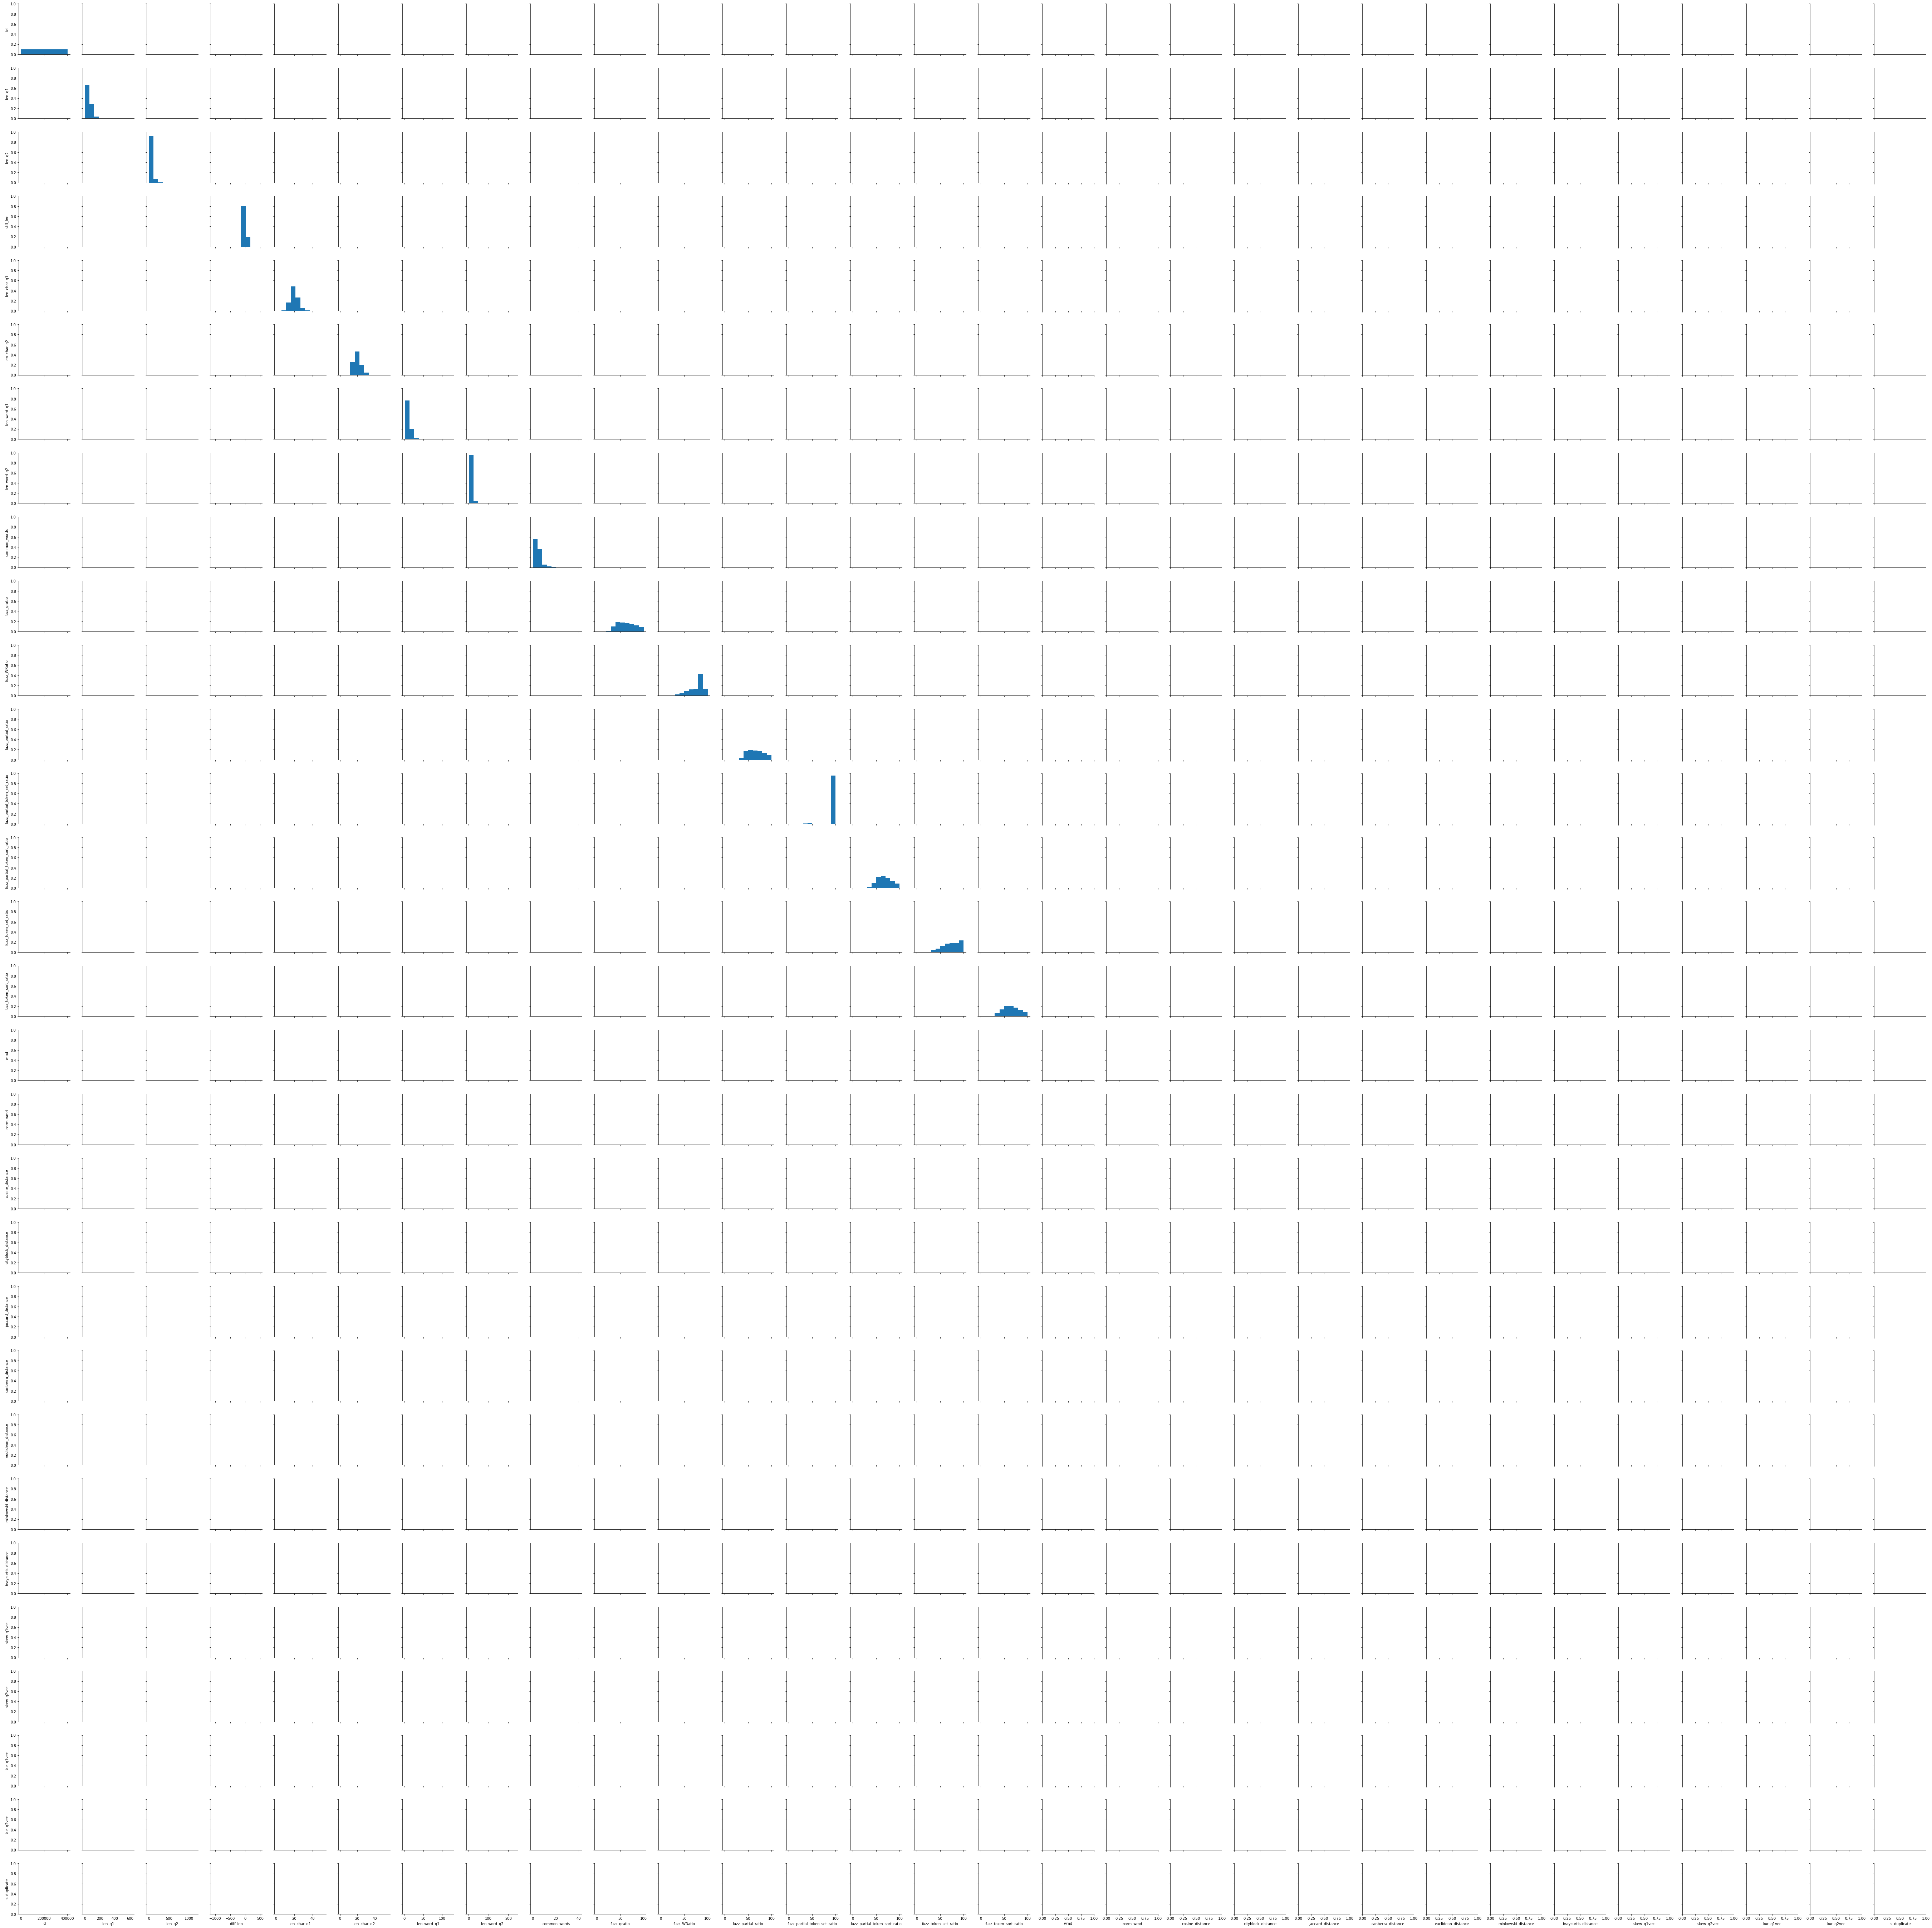

In [59]:
sns.pairplot(file)